In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./data250824.csv', index_col=[0], header=[0])
scaler = StandardScaler()

In [8]:
# Define feature sets
feature_sets = {
    'vi-qc': ['X3', 'X2', 'X1', 'X17'],
    'ga-qc': ['X2', 'X4', 'X15', 'X16'],
    'vi-ms': ['M43', 'M58', 'M2', 'M42'],
    'ga-ms': ['M2', 'M52', 'M67', 'M102']
}

# Define models with tuned hyperparameters (FOR WHOLE DATA SET)
tuned_hyperparameters = {
    'vi-qc': {
        'RF': {'bootstrap': False, 'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 10, 'min_samples_split': 11, 'n_estimators': 99, 'random_state': 42, 'n_jobs': -1},
        'SVR': {'C': 124.34299606015858, 'epsilon': 0.1436663234855287, 'kernel': 'rbf'},
        'XGB': {'booster':'gbtree', 'device':'cpu', 'objective':'reg:squarederror', 'verbosity': 2, 'tree_method':'auto', 'seed': 42, 'n_jobs': -1,
                'colsample_bytree': 0.10108222695147716, 'gamma': 0.03195015716291206, 'learning_rate': 0.1532942849179548, 'max_depth': 3, 'min_child_weight': 2.5672988836952646, 'reg_alpha': 0.28393875667236645, 'reg_lambda': 8.471227306156468, 'subsample': 0.36934305158488395}
    },
    'ga-qc': {
        'RF': {'bootstrap': True, 'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 59, 'random_state': 42, 'n_jobs': -1},
        'SVR': {'C': 1.0, 'epsilon': 0.1, 'kernel': 'rbf'},
        'XGB': {'booster':'gbtree', 'objective':'reg:squarederror', 'verbosity': 2, 'tree_method':'auto', 'seed': 42, 'n_jobs': -1,
                'colsample_bytree': 0.1360716562727799, 'gamma': 0.16137390404554144, 'learning_rate': 0.2727409061252117, 'max_depth': 2, 'min_child_weight': 3.9511645755552687, 'reg_alpha': 0.16804646499331374, 'reg_lambda': 8.104479048297152, 'subsample': 0.6070548406804517},
        'MLR': {}
    },
    'vi-ms': {
        'RF': {'bootstrap': True, 'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 147, 'random_state': 42, 'n_jobs': -1},
        'SVR': {'C': 1.6028197376373123, 'degree': 4, 'epsilon': 0.0, 'kernel': 'rbf'},
        'XGB': {'booster':'gbtree', 'device':'cpu', 'objective':'reg:squarederror', 'verbosity': 2, 'tree_method':'auto', 'seed': 42, 'validate_parameters': True, 'n_jobs': -1,
                'colsample_bytree': 0.9915139189418589, 'gamma': 0.7183487649345512, 'learning_rate': 0.04234226319867907, 'max_depth': 6, 'min_child_weight': 0.7111973058597089, 'reg_alpha': 0.002473915667967762, 'reg_lambda': 0.2952577589021902, 'subsample': 0.33404173513149854}
    },
    'ga-ms': {
        'RF': {'bootstrap': True, 'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 126, 'random_state': 42, 'n_jobs': -1},
        'SVR': {'C': 4.752986507554117, 'epsilon': 0.21223832828344527, 'kernel': 'rbf'},
        'XGB': {'booster':'gbtree', 'device':'cpu', 'objective':'reg:squarederror', 'verbosity': 2, 'tree_method':'auto', 'seed': 42, 'validate_parameters': True, 'n_jobs': -1,
                },
        'MLR': {}
    }
}

y = data['pIC50']

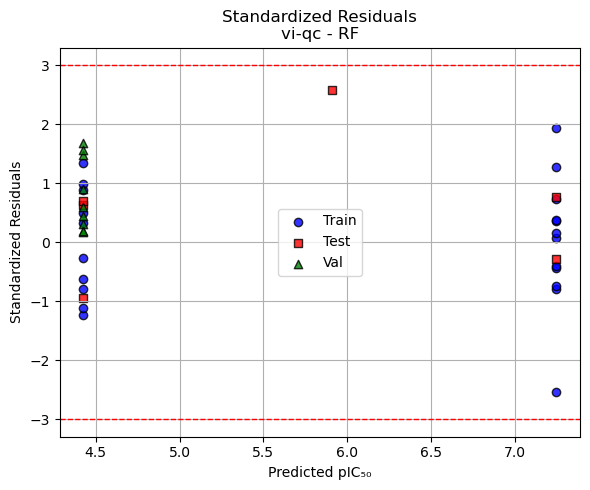

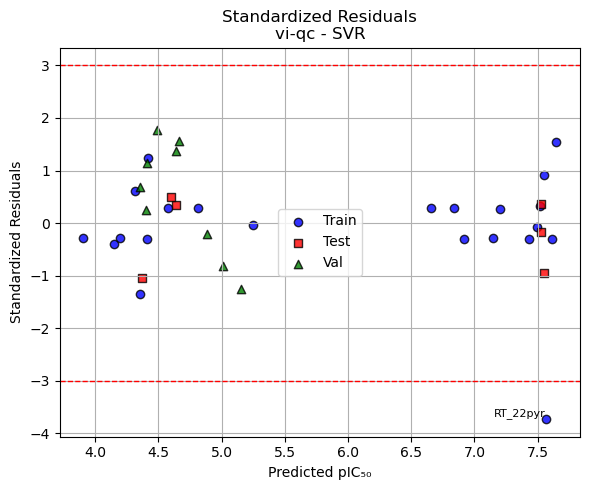

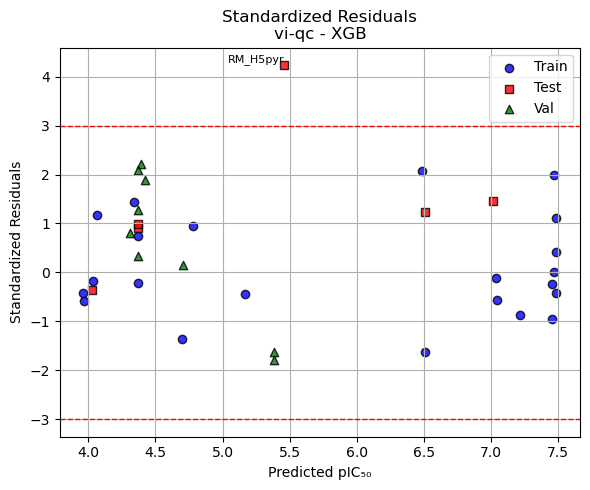

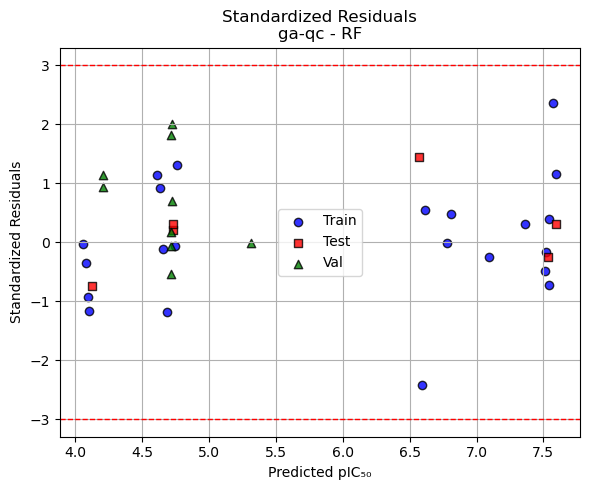

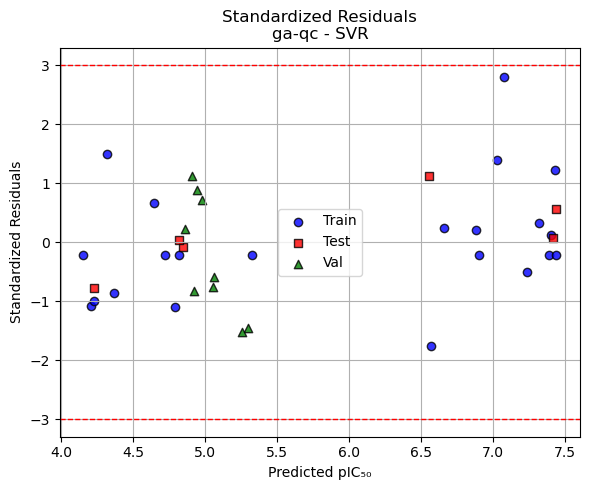

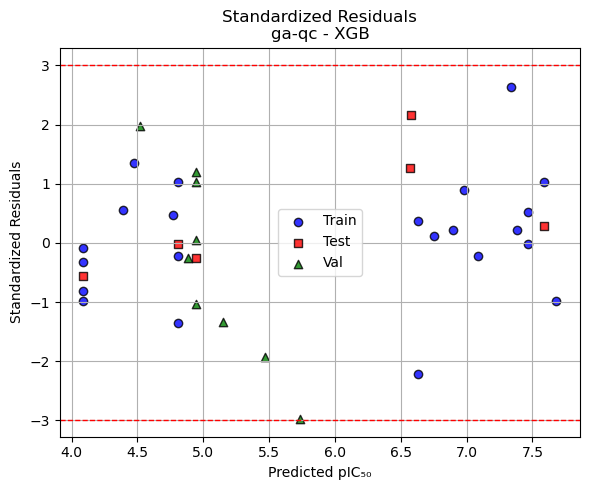

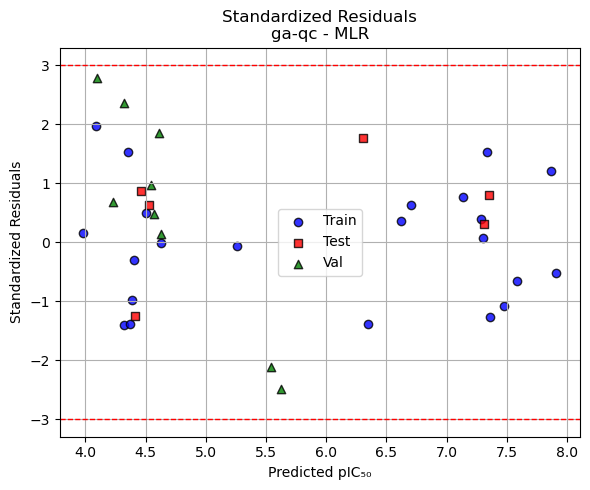

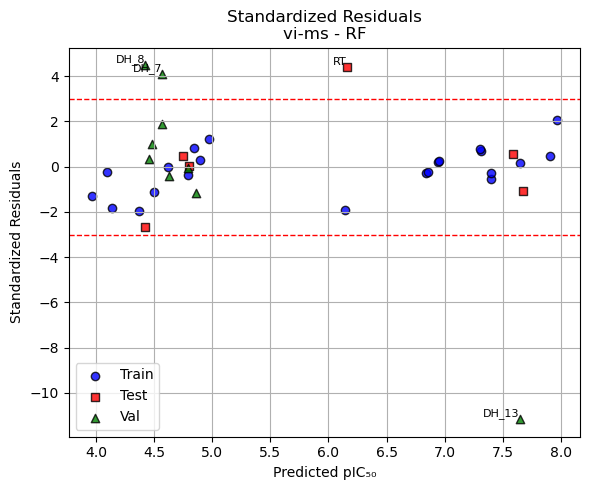

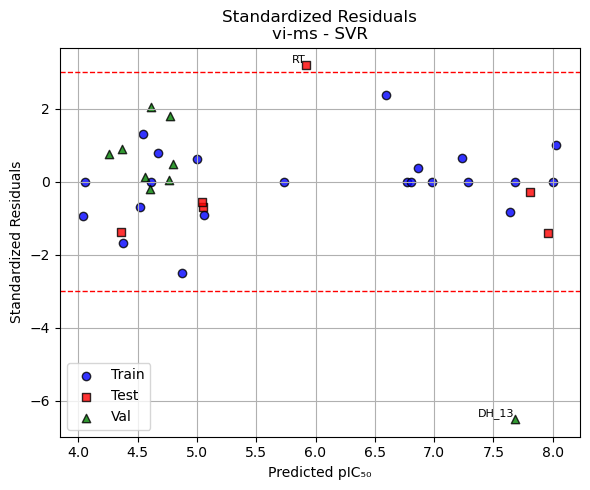

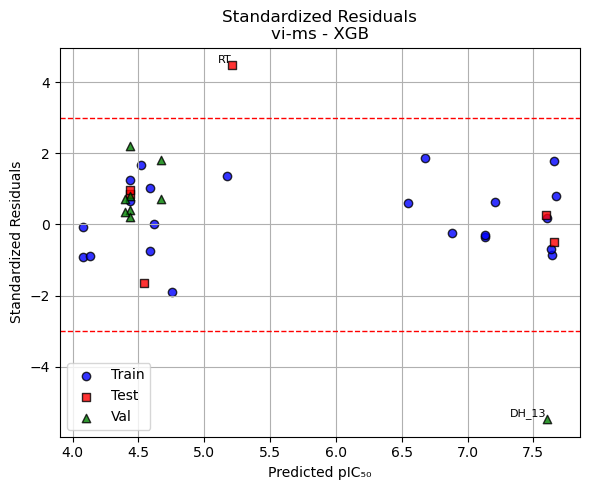

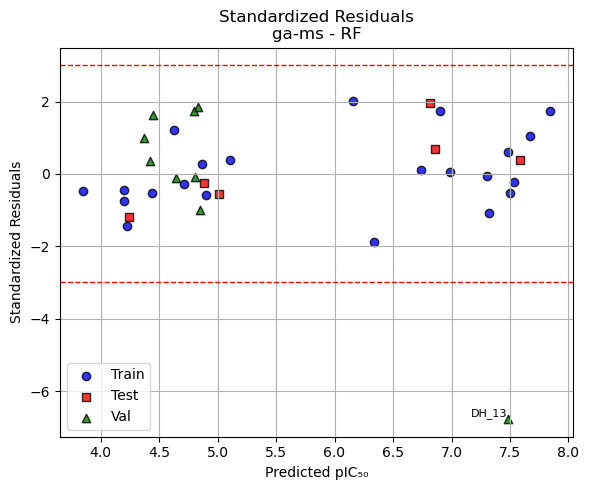

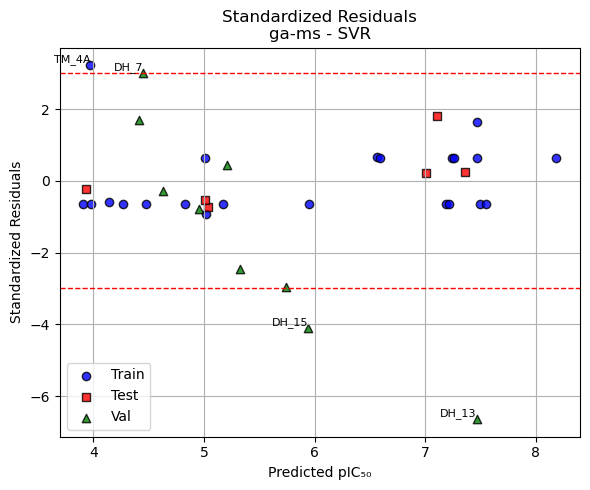

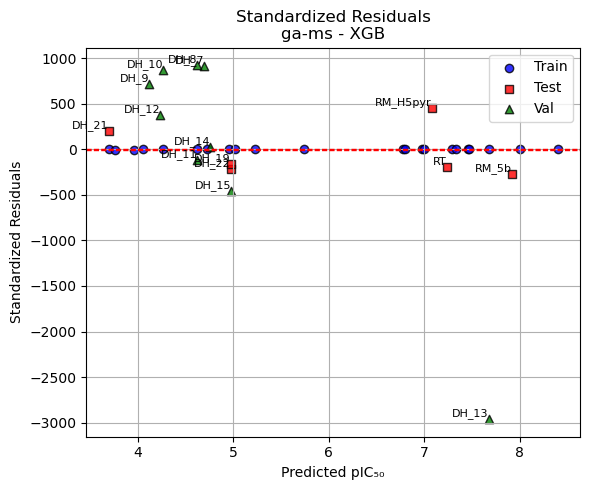

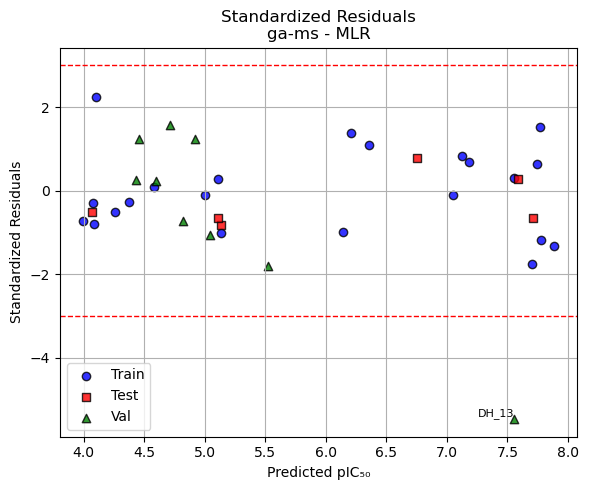

In [9]:
import matplotlib.pyplot as plt
import numpy as np

split_styles = {
    'Train': {'color': 'blue', 'marker': 'o'},
    'Test': {'color': 'red', 'marker': 's'},
    'Val': {'color': 'green', 'marker': '^'}
}

for feature_set_name, features in feature_sets.items():
    X = data[features]
    X_train = X.iloc[:22]
    X_test = X.iloc[22:28]
    X_val = X.iloc[28:37]
    y_train = y.iloc[:22]
    y_test = y.iloc[22:28]
    y_val = y.iloc[28:37]    

    # Scale if needed
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)

    for model_name, hyperparams in tuned_hyperparameters[feature_set_name].items():
        # Model setup
        if model_name == 'RF':
            model = RandomForestRegressor(**hyperparams)
            X_train_model, X_test_model, X_val_model = X_train, X_test, X_val
        elif model_name == 'SVR':
            model = SVR(**hyperparams)
            X_train_model, X_test_model, X_val_model = X_train_scaled, X_test_scaled, X_val_scaled
        elif model_name == 'XGB':
            model = XGBRegressor(**hyperparams)
            X_train_model, X_test_model, X_val_model = X_train, X_test, X_val
        elif model_name == 'MLR':
            model = LinearRegression()
            X_train_model, X_test_model, X_val_model = X_train, X_test, X_val

        model.fit(X_train_model, y_train)
        y_train_pred = model.predict(X_train_model)
        y_test_pred = model.predict(X_test_model)
        y_val_pred = model.predict(X_val_model)

        # Compute std dev of residuals from training set
        train_residuals = y_train - y_train_pred
        std_dev = np.std(train_residuals)

        # Collect data to plot
        plot_data = {
            'Train': (y_train_pred, (y_train - y_train_pred) / std_dev, y_train.index),
            'Test': (y_test_pred, (y_test - y_test_pred) / std_dev, y_test.index),
            'Val': (y_val_pred, (y_val - y_val_pred) / std_dev, y_val.index),
        }

        # === Combined Standardized Residual Plot ===
        plt.figure(figsize=(6, 5))
        for split_name, (y_pred, std_resid, indices) in plot_data.items():
            plt.scatter(
                y_pred, std_resid,
                alpha=0.8,
                label=split_name,
                color=split_styles[split_name]['color'],
                marker=split_styles[split_name]['marker'],
                edgecolor = 'k'
            )

            # Add labels for outliers (|std_residual| > 3)
            for i, (x, yi, idx) in enumerate(zip(y_pred, std_resid, indices)):
                if abs(yi) > 3:
                    plt.text(x, yi, str(idx), fontsize=8, color='black', ha='right', va='bottom')

        plt.axhline(y=3, color='red', linestyle='--', linewidth=1)
        plt.axhline(y=-3, color='red', linestyle='--', linewidth=1)
        plt.title(f"Standardized Residuals\n{feature_set_name} - {model_name}")
        plt.xlabel('Predicted pIC₅₀')
        plt.ylabel('Standardized Residuals')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


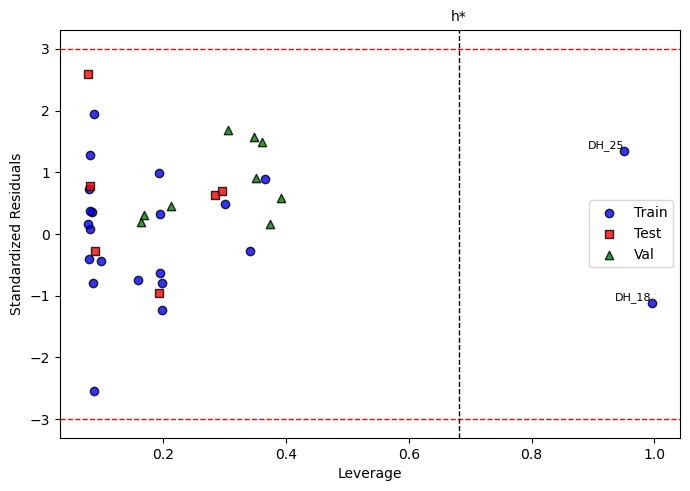

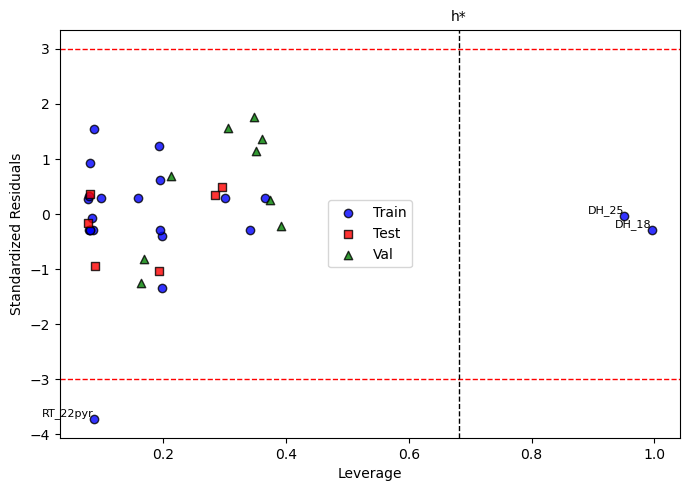

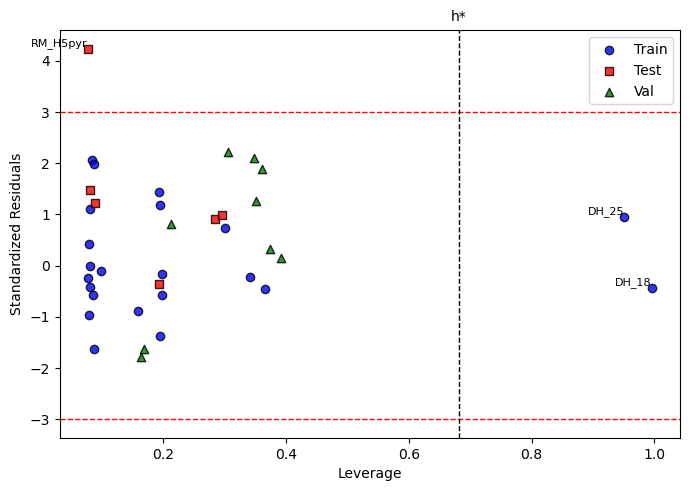

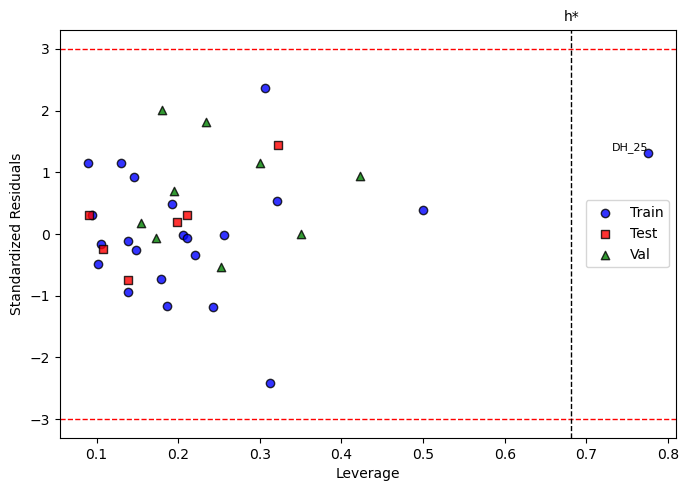

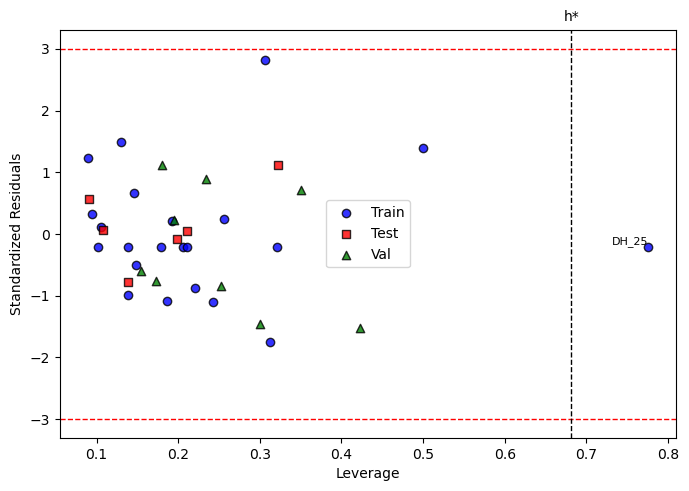

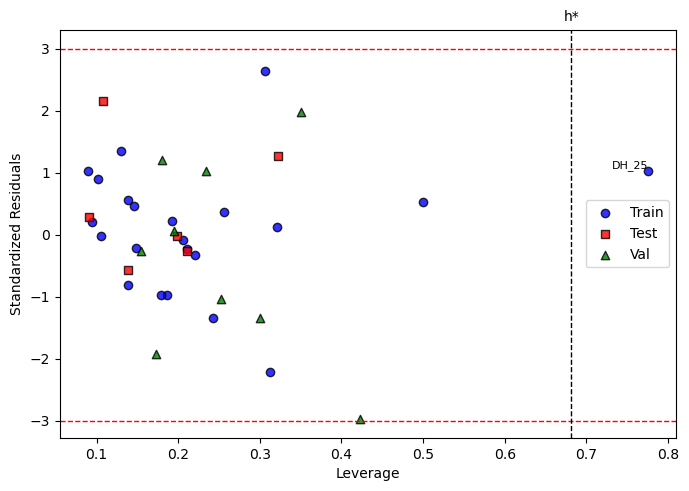

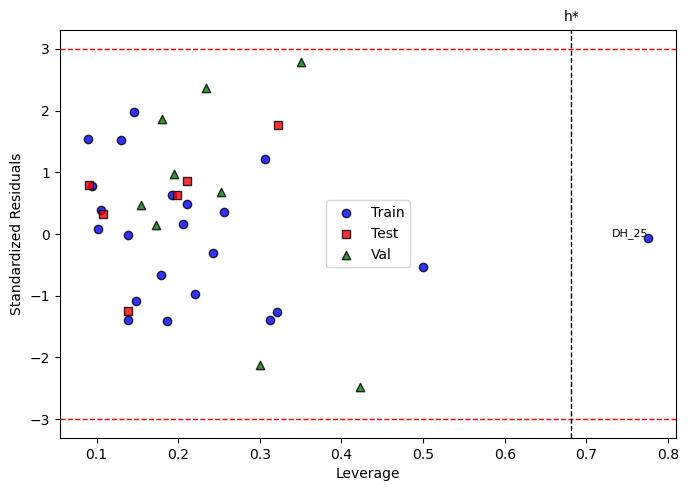

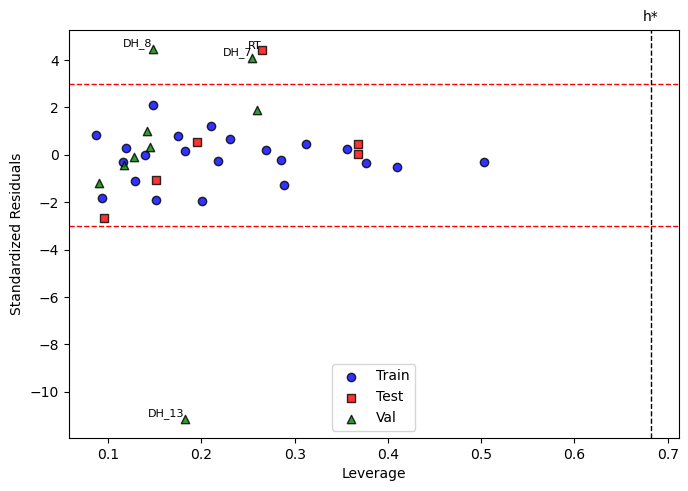

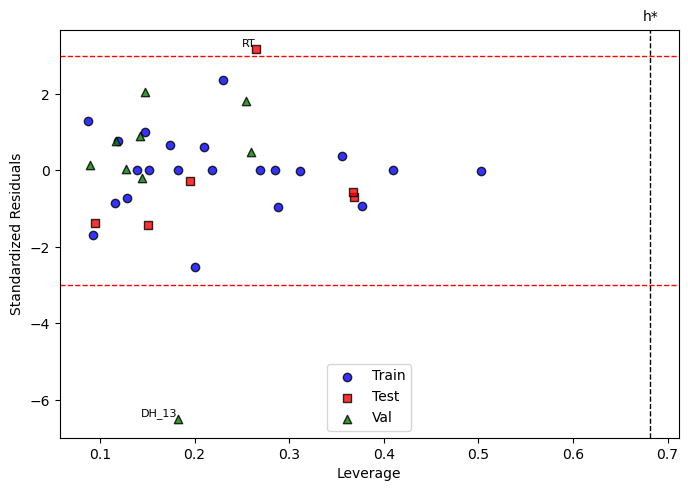

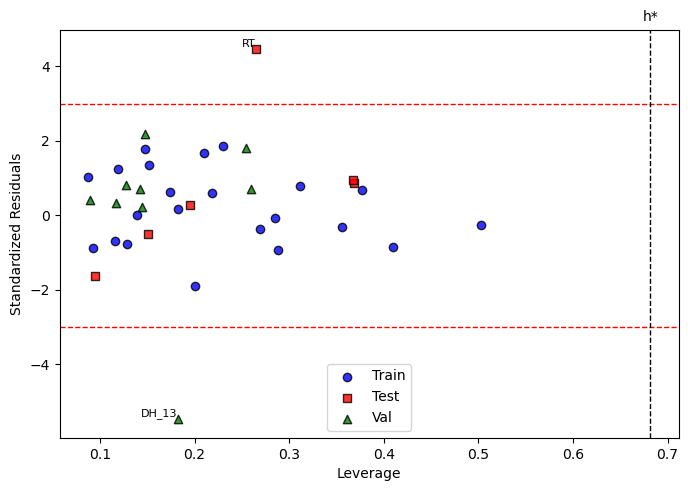

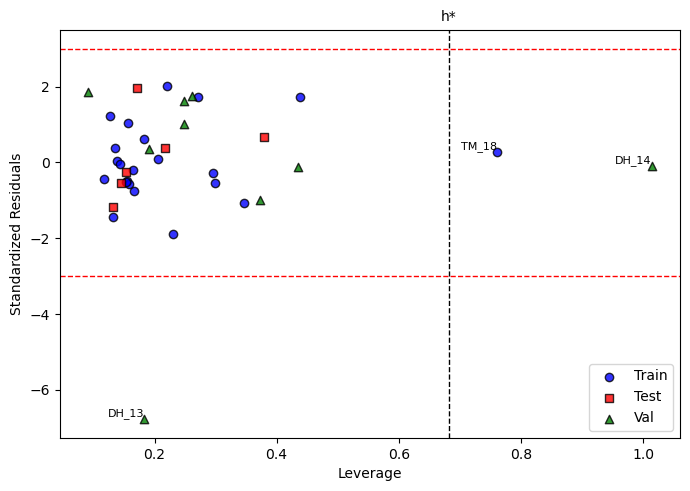

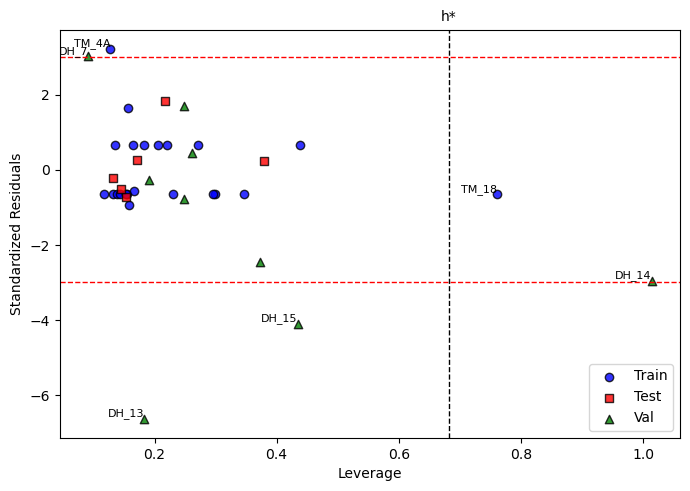

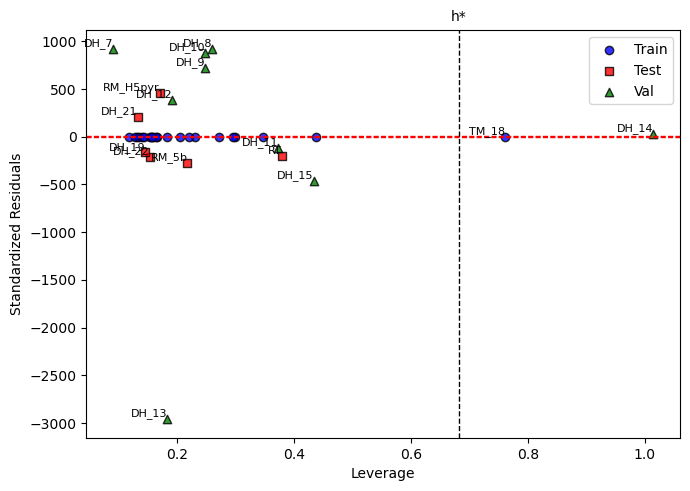

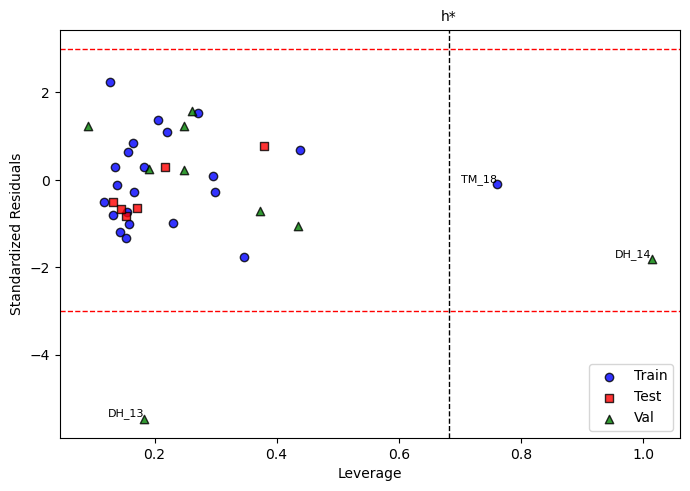

In [10]:
scaler = StandardScaler()
results = []

for feature_set_name, features in feature_sets.items():
    X = data[features].values
    y_values = y.values

    # Split the data
    X_train = X[:22]
    X_test = X[22:28]
    y_train = y_values[:22]
    y_test = y_values[22:28]
    X_val = X[28:37]
    y_val = y_values[28:37]

    # Scale if needed
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)

    for model_name, hyperparams in tuned_hyperparameters[feature_set_name].items():
        # Model setup
        if model_name == 'RF':
            model = RandomForestRegressor(**hyperparams)
            X_train_model = X_train
            X_test_model = X_test
            X_val_model = X_val
        elif model_name == 'SVR':
            model = SVR(**hyperparams)
            X_train_model = X_train_scaled
            X_test_model = X_test_scaled
            X_val_model = X_val_scaled
        elif model_name == 'XGB':
            model = XGBRegressor(**hyperparams)
            X_train_model = X_train
            X_test_model = X_test
            X_val_model = X_val
        elif model_name == 'MLR':
            model = LinearRegression()
            X_train_model = X_train
            X_test_model = X_test
            X_val_model = X_val
        else:
            continue  # Skip unknown models

        # Fit and predict
        model.fit(X_train_model, y_train)
        y_train_pred = model.predict(X_train_model)
        y_test_pred = model.predict(X_test_model)
        y_val_pred = model.predict(X_val_model)
        
        # Combined William's plot for all sets
        all_leverages = []
        all_std_residuals = []
        all_labels = []

        split_definitions = [
            ("Train", X_train_model, y_train),
            ("Test", X_test_model, y_test),
            ("Val", X_val if model_name != 'SVR' else scaler.transform(X_val), y_val),
        ]

        # Compute std dev of residuals from training set
        train_residuals = y_train - y_train_pred
        std_dev = np.std(train_residuals)
        
        for split_name, X_split, y_split in split_definitions:
            y_pred = model.predict(X_split)
            residuals = y_split - y_pred
            std_residuals = residuals / std_dev

            X_aug = np.hstack([np.ones((X_split.shape[0], 1)), X_split])
            X_train_aug = np.hstack([np.ones((X_train_model.shape[0], 1)), X_train_model])
            H = X_aug @ np.linalg.inv(X_train_aug.T @ X_train_aug) @ X_aug.T
            leverage = np.diag(H)
           

            all_leverages.extend(leverage)
            all_std_residuals.extend(std_residuals)
            all_labels.extend([split_name] * len(leverage))

        # === Save combined data to CSV AFTER all splits ===
        plot_data = pd.DataFrame({
            'Feature Set': feature_set_name,
            'Model': model_name,
            'Split': all_labels,
            'Leverage': all_leverages,
            'Standardized Residuals': all_std_residuals
        })
        csv_filename = f"williams_plot_data_{feature_set_name}_{model_name}.csv"
        plot_data.to_csv(csv_filename, index=False)

        # Plotting all in one
        colors = {'Train': 'blue', 'Test': 'red', 'Val': 'green'}
        markers = {'Train': 'o', 'Test': 's', 'Val': '^'}

        # Make a list of sample names
        sample_names = list(data.index[:22]) + list(data.index[22:28]) + list(data.index[28:37])

        # Match number of samples
        all_sample_names = []
        for split_name in ['Train', 'Test', 'Val']:
            if split_name == 'Train':
                all_sample_names.extend(data.index[:22])
            elif split_name == 'Test':
                all_sample_names.extend(data.index[22:28])
            else:  # Val
                all_sample_names.extend(data.index[28:37])

        plt.figure(figsize=(7, 5))

        # Common thresholds
        p = X_train_model.shape[1]
        n_total = len(y_train)
        leverage_threshold = 3 * (p + 1) / n_total
        std_res_threshold = 3.0
        
        for label in ['Train', 'Test', 'Val']:
            idx = [i for i, l in enumerate(all_labels) if l == label]
            x_plot = np.array(all_leverages)[idx]
            y_plot = np.array(all_std_residuals)[idx]
            name_plot = np.array(all_sample_names)[idx]
            
            plt.scatter(
                x_plot,
                y_plot,
                label=label,
                color=colors[label],
                marker=markers[label],
                alpha=0.8,
                edgecolor = 'black'
            )

         # Annotate only outliers
            for xi, yi, name in zip(x_plot, y_plot, name_plot):
                if abs(yi) > std_res_threshold or xi > leverage_threshold:
                    plt.text(xi, yi, str(name), fontsize=8, color='black', ha='right', va='bottom')

        plt.axhline(y=std_res_threshold, color='red', linestyle='--', linewidth=1)
        plt.axhline(y=-std_res_threshold, color='red', linestyle='--', linewidth=1)
        plt.axvline(x=leverage_threshold, color='black', linestyle='--', linewidth=1)

        # Add 'h*' label 
        plt.text(leverage_threshold, plt.ylim()[1] + 0.05 * (plt.ylim()[1] - plt.ylim()[0]), 
                 'h*', color='black', ha='center', va='top')

        plt.xlabel('Leverage')
        plt.ylabel('Standardized Residuals')
        plt.legend()
        plt.grid(False)
        plt.tight_layout()
        plt.savefig(f"WP-{feature_set_name}-{model_name}.tif", dpi=330)
        plt.show()

In [11]:
print(p)
print(n_total)

4
22
